### Import libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [81]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Train test split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [83]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


### Scaling the features

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Build a logistic regression model

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit( X_train, y_train)

LogisticRegression(random_state=0)

### Predict the test set

In [86]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


In [87]:
y_pred = classifier.predict(X_test)

In [88]:
print(np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]]


### Confusion Matrix & Accuracy

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[63,  5],
       [ 8, 24]])

In [90]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [91]:
print(f"Confusion Matrix:\n tn:{tn} \n fp:{fp} \n fn:{fn} \n tp:{tp}")

Confusion Matrix:
 tn:63 
 fp:5 
 fn:8 
 tp:24


In [92]:
accuracy_score(y_test, y_pred)

0.87

### Visualize the train set results

/var/folders/bv/lfhs9spj5ldb88y3g1cy9z_w0000gn/T/ipykernel_1760/1173517675.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[ y_set == j, 0], x_set[ y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


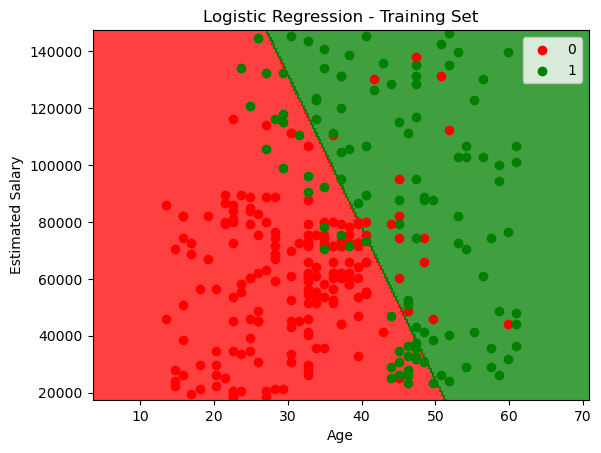

In [79]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange( start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() +10, step = 0.25),
                       np.arange( start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[ y_set == j, 0], x_set[ y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression - Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualize the test set results

/var/folders/bv/lfhs9spj5ldb88y3g1cy9z_w0000gn/T/ipykernel_1760/2689949746.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[ y_set == j, 0], x_set[ y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


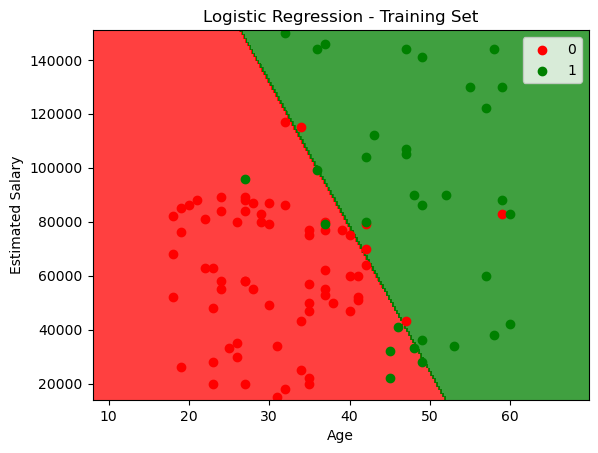

In [93]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange( start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() +10, step = 0.25),
                       np.arange( start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 0.25))

plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[ y_set == j, 0], x_set[ y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()